In [1]:
# Importing the libraries
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler


In [2]:
# Reading the data
dataset = pd.read_csv("Dataset\china.arff.csv")
x = np.array(dataset.drop(['Effort'],axis=1))
y = np.array(dataset['Effort'])

In [3]:
dataset.head()

,Input,Output,Enquiry,File,Interface,Duration,Effort
0,774,260,340,128,0,4.0,7490
1,9,4,3,193,41,17.0,4150
2,25,33,28,42,35,9.0,668
3,151,28,8,39,0,4.0,3238
4,93,0,194,20,0,13.0,2994


In [4]:
y.shape

(499,)

In [5]:
scaler=MinMaxScaler(feature_range=(0,1))
x=scaler.fit_transform(x)
y=np.reshape(y,(499,1))
y=scaler.fit_transform(y)

In [6]:
x_train_full, x_test, y_train_full, y_test = train_test_split(x, y, test_size = 0.2, random_state =67)

In [7]:
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.33, random_state=1)

In [8]:




from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR



model1 = DecisionTreeRegressor()
model1.fit(x_train, y_train)
val_pred1=model1.predict(x_val)
test_pred1=model1.predict(x_test)
val_pred1=pd.DataFrame(val_pred1)
test_pred1=pd.DataFrame(test_pred1)

model2 = KNeighborsRegressor()
model2.fit(x_train,y_train)
val_pred2=model2.predict(x_val)
test_pred2=model2.predict(x_test)
val_pred2=pd.DataFrame(val_pred2)
test_pred2=pd.DataFrame(test_pred2)


model3 = SVR()
model3.fit(x_train,y_train)
val_pred3=model2.predict(x_val)
test_pred3=model2.predict(x_test)
val_pred3=pd.DataFrame(val_pred3)
test_pred3=pd.DataFrame(test_pred3)



# // Note: x_val is numpy array, not dataframe, so to use in concat, it must be converted to dataframe

df_val=pd.concat([pd.DataFrame(x_val), val_pred1,val_pred2,val_pred3],axis=1)
df_test=pd.concat([pd.DataFrame(x_test), test_pred1,test_pred2,test_pred3],axis=1)

model = DecisionTreeRegressor()
model.fit(df_val,y_val)  
# X_train,y_train
model.score(df_test,y_test)
# X_test,y_test

y_pred=model.predict(df_test)



c:\Users\sachi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
y.shape

(499, 1)

In [10]:
y_pred=np.reshape(y_pred,(100,1))
y_test=np.reshape(y_test,(100,1))

In [11]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [12]:
# y_pred

In [13]:
# y_test

In [14]:
def calculate_smape(actual, predicted) -> float:
  
    # Convert actual and predicted to numpy
    # array data type if not already
    if not all([isinstance(actual, np.ndarray), 
                isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual),
        np.array(predicted)
  
    return round(
        np.mean(
            np.abs(predicted - actual) / 
            ((np.abs(predicted) + np.abs(actual))/2)
        )*100, 2
    )

In [15]:
# RMSE (Root Mean Square Error)
mse=mean_squared_error(y_test, y_pred)
print("\nMSE:\n",mse)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("\nRMSE:\n",rmse)
mape=mape(y_test, y_pred)
print("\nMAPE:\n",mape)

smape = calculate_smape(y_test, y_pred)
print("\nSMAPE:\n",smape)
r2_score=1 - (1-model.score(df_val, y_val))*(len(y_val)-1)/(len(y_val)-df_val.shape[1]-1)
print("\n Adj R2 score:\n",r2_score)


MSE:
 0.007153849838611702

RMSE:
 0.0845804341358668

MAPE:
 170.7506911301514

SMAPE:
 89.12

 Adj R2 score:
 1.0


In [16]:
y_pred=scaler.inverse_transform(y_pred)
y_test=scaler.inverse_transform(y_test)

In [17]:
y_test=np.reshape(y_test,(100,))
y_pred=np.reshape(y_pred,(100,))

In [18]:
dfr=pd.DataFrame({'Actual Effort':y_test, 'Predicted effort':y_pred})
print(dfr)

    Actual Effort  Predicted effort
0         49034.0           29399.0
1           646.0             334.0
2         27000.0           17607.0
3          1028.0             410.0
4          2244.0             448.0
..            ...               ...
95          191.0             470.0
96         1134.0            3646.0
97          494.0             448.0
98          183.0            1817.0
99          329.0            7459.0

[100 rows x 2 columns]


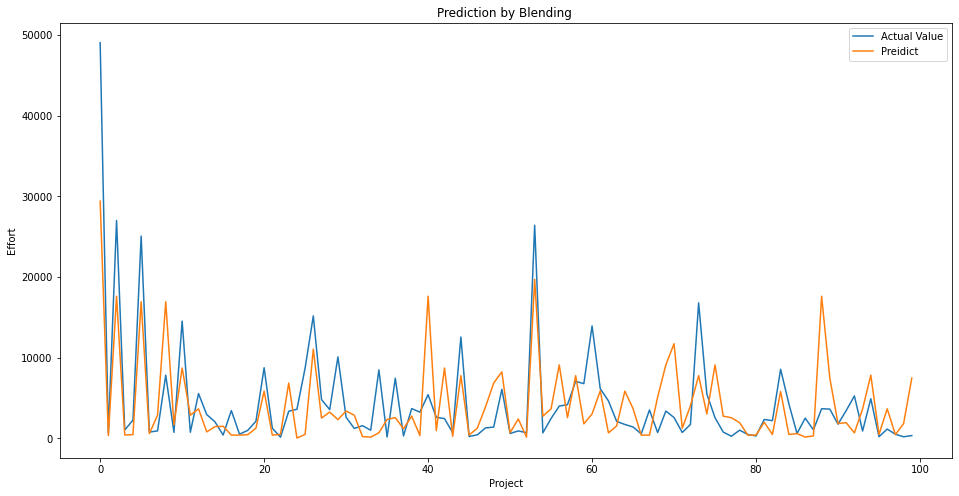

In [19]:
#Predicted vs Actual Close Value 
from matplotlib import pyplot as plt 
plt.figure(figsize=(16,8))
plt.plot(y_test, label="Actual Value")
plt.plot(y_pred, label="Preidict")
plt.title("Prediction by Blending ")
plt.xlabel("Project")
plt.ylabel("Effort")
plt.legend()
plt.show()